#**GRADES PREDICTION - GROUP 1**


In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/MyDrive/Education Problem'

Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/1VLhHZiw8t-jb49FpYHfR0dgO6hjbu9RK/Education Problem


#**1. Importing Libraries**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tqdm
import seaborn as sns
import json 


In [4]:
import warnings
warnings.filterwarnings('ignore')

#**2. Load Dataset**

Sử dụng dữ liệu về điểm trung bình các học kỳ của sinh viên (sinhvien_dtv_hocky.xlsx)

In [ ]:
df_raw = pd.read_excel('./data_raw/sinhvien_dtb_hocky.xlsx')
df_raw.shape, df_raw.head()

In [ ]:
df_raw_sv = pd.read_excel('./data_raw/01.sinhvien.xlsx')
df_raw_sv.shape, df_raw_sv.head()

((8316, 69),
     id                                      mssv   namsinh   gioitinh  \
 0  1.0  BE375BAAXPvAibaEXe9JDlHA4z2GHJ3/PVStCxR2    1995.0        1.0   
 1  2.0  2420ED57XPvAibaEXe/Lh6v1XxTKJa6JLFRUPkLM    1995.0        1.0   
 2  3.0  83B76C01XPvAibaEXe/lOccskaOiO2K46r7t4qnt    1994.0        1.0   
 3  4.0  91F785ABXPvAibaEXe/lOccskaOiO5y4GbVvuRQu    1995.0        1.0   
 4  5.0  007C275DXPvAibaEXe+TFgEDwYNnveOOmOYeYzF6    1995.0        1.0   
 
                   noisinh      lopsh     khoa   hedt   khoahoc  chuyennganh2  \
 0         TP. Hồ Chí Minh   KTPM0001     CNPM   CQUI       8.0       D480103   
 1               Đồng Tháp   HTTT0001     HTTT   CTTT       8.0       D480104   
 2             Hà Nam Ninh   KHMT2013     KHMT   CQUI       8.0       D480101   
 3         TP. Hồ Chí Minh   HTTT0001     HTTT   CTTT       8.0       D480104   
 4   Thành phố Hồ Chí Minh   MMTT0001   MMT&TT   CQUI       8.0       D480201   
 
    ...  _47  _48  _49  _50  _51  _52  _53  _54  _55 

## Tiền xử lý file 01.sinhvien.xlsx

In [ ]:
df_sv = df_raw_sv.iloc[:,0:12]
df_sv.head

<bound method NDFrame.head of            id                                      mssv   namsinh   gioitinh  \
0         1.0  BE375BAAXPvAibaEXe9JDlHA4z2GHJ3/PVStCxR2    1995.0        1.0   
1         2.0  2420ED57XPvAibaEXe/Lh6v1XxTKJa6JLFRUPkLM    1995.0        1.0   
2         3.0  83B76C01XPvAibaEXe/lOccskaOiO2K46r7t4qnt    1994.0        1.0   
3         4.0  91F785ABXPvAibaEXe/lOccskaOiO5y4GbVvuRQu    1995.0        1.0   
4         5.0  007C275DXPvAibaEXe+TFgEDwYNnveOOmOYeYzF6    1995.0        1.0   
...       ...                                       ...       ...        ...   
8311  19283.0  7D7633B0XPvAibaEXe95IhrkYSGfcCQVGm4nFGyt    2000.0        1.0   
8312  19284.0  AB431338XPvAibaEXe8xMCTZ03/BexWzDCyWVsT3    2001.0        1.0   
8313  19285.0  75AD7B4AXPvAibaEXe8xMCTZ03/BewoGrWSt0ZXM    2001.0        1.0   
8314  19345.0  CB263C18XPvAibaEXe8xMCTZ03/Be8yk40QWdPiR    2000.0        1.0   
8315  21059.0  7CD9B404XPvAibaEXe8M4ltS8XjC9c/g97NvpP52    2001.0        1.0   

         

Chúng ta sẽ sử dụng các thuộc tính gồm mssv, gioitinh, noisinh, khoa và hedt để mô tả thông tin cơ bản của sinh viên.

In [ ]:
col = ["mssv", " gioitinh", " noisinh", " khoa", " hedt"]
df_sv = df_sv[col]
df_sv

,mssv,gioitinh,noisinh,khoa,hedt
0,BE375BAAXPvAibaEXe9JDlHA4z2GHJ3/PVStCxR2,1.0,TP. Hồ Chí Minh,CNPM,CQUI
1,2420ED57XPvAibaEXe/Lh6v1XxTKJa6JLFRUPkLM,1.0,Đồng Tháp,HTTT,CTTT
2,83B76C01XPvAibaEXe/lOccskaOiO2K46r7t4qnt,1.0,Hà Nam Ninh,KHMT,CQUI
3,91F785ABXPvAibaEXe/lOccskaOiO5y4GbVvuRQu,1.0,TP. Hồ Chí Minh,HTTT,CTTT
4,007C275DXPvAibaEXe+TFgEDwYNnveOOmOYeYzF6,1.0,Thành phố Hồ Chí Minh,MMT&TT,CQUI
...,...,...,...,...,...
8311,7D7633B0XPvAibaEXe95IhrkYSGfcCQVGm4nFGyt,1.0,'An Giang',MMT&TT,CLC
8312,AB431338XPvAibaEXe8xMCTZ03/BexWzDCyWVsT3,1.0,'Bình Thuận',KHMT,CQUI
8313,75AD7B4AXPvAibaEXe8xMCTZ03/BewoGrWSt0ZXM,1.0,'Lâm Đồng',KHMT,CQUI
8314,CB263C18XPvAibaEXe8xMCTZ03/Be8yk40QWdPiR,1.0,'Bến Tre',KTTT,CQUI


### Xóa dữ liệu NaN

In [ ]:
df_sv = df_sv.dropna()

In [ ]:
#Sửa tên cột (xóa khoảng trắng)
col_name = []
for col in df_sv.columns:
  c = col.replace(" ",'')
  col_name.append(c)

df_sv.set_axis(col_name, axis='columns', inplace=True)
df_sv.shape

(8295, 5)

In [ ]:
df_sv = df_sv[df_sv["noisinh"] != ' NULL']
df_sv.shape

(8274, 5)

### Thống nhất thuộc tính noisinh

Thuộc tính noisinh chứa các giá trị không rõ ràng, dễ gây nhiễu trong bộ dữ liệu. Bên cạnh đó, dữ liệu hiện có đã lỗi thời và cần cập nhật lại

In [ ]:
#Xử lí tỉnh "Hà Nam Ninh" thành "Hà Nam"
df_sv['noisinh'] = df_sv['noisinh'].replace("Nam Ninh",'Nam', regex=True)
#Xử lí tỉnh "Hải Hưng" thành "Hưng Yên"
df_sv['noisinh'] = df_sv['noisinh'].replace("Hải Hưng",'Hưng Yên', regex=True)
#Xử lí tỉnh "Sông Bé" thành "Bình Dương"
df_sv['noisinh'] = df_sv['noisinh'].replace("Sông Bé",'Bình Dương', regex=True)
#Xử lí "quận Thủ Đức" thành "Hồ Chí Minh"
df_sv['noisinh'] = df_sv['noisinh'].replace("Quận Thủ Đức",'Hồ Chí Minh', regex=True)
#Xử lí "Hà Sơn Bình" thành "Hà Nội"
df_sv['noisinh'] = df_sv['noisinh'].replace("Hà Sơn Bình",'Hà Nội', regex=True)
#Xử lí "Nghĩa Sơn - Nghĩa Hưng - Nam Định" thành "Nam Định"
df_sv['noisinh'] = df_sv['noisinh'].replace("Nghĩa Sơn - Nghĩa Hưng - Nam Định",'Nam Định', regex=True)
#Xử lí "Đà Lạt" thành "Lâm Đồng"
df_sv['noisinh'] = df_sv['noisinh'].replace("Đà Lạt",'Lâm Đồng', regex=True)
#Xử lí "Minh Hải" thành "Cà Mau"
df_sv['noisinh'] = df_sv['noisinh'].replace("Minh Hải",'Cà Mau', regex=True)
#Xử lí "Long Hồ" thành "Vĩnh Long"
df_sv['noisinh'] = df_sv['noisinh'].replace("LONG HỒ",'Vĩnh Long', regex=True)

In [ ]:
print(df_sv.dtypes)
# xác định miền giá trị str
for i  in df_sv.columns:
  print(i,df_sv[i].unique())

mssv         object
gioitinh    float64
noisinh      object
khoa         object
hedt         object
dtype: object
mssv ['BE375BAAXPvAibaEXe9JDlHA4z2GHJ3/PVStCxR2'
 '2420ED57XPvAibaEXe/Lh6v1XxTKJa6JLFRUPkLM'
 '83B76C01XPvAibaEXe/lOccskaOiO2K46r7t4qnt' ...
 '75AD7B4AXPvAibaEXe8xMCTZ03/BewoGrWSt0ZXM'
 'CB263C18XPvAibaEXe8xMCTZ03/Be8yk40QWdPiR'
 '7CD9B404XPvAibaEXe8M4ltS8XjC9c/g97NvpP52']
gioitinh [1. 0.]
noisinh ['Hồ Chí Minh' 'Đồng Tháp' 'Hà Nam' 'Hà Tĩnh' 'Thanh Hóa' 'Quảng Ngãi'
 'Khánh Hòa' 'Cần Thơ' 'Gia Lai' 'Tiền Giang' 'Vĩnh Long' 'Bình Dương'
 'Kiên Giang' 'Lâm Đồng' 'Hải Dương' 'Trà Vinh' 'Nam Định' 'Quảng Nam'
 'Bình Thuận' 'Quảng Bình' 'Bến Tre' 'Ninh Thuận' 'Bình Định' 'An Giang'
 'Bà Rịa - Vũng Tàu' 'Thừa Thiên Huế' 'Kon Tum' 'Tây Ninh' 'Hà Nội'
 'Đồng Nai' 'Nghệ An' 'Hưng Yên' 'Đắk Lắk' 'Đắk Nông' 'Long An'
 'Thái Bình' 'Bình Phước' 'Đà Nẵng' 'Ninh Bình' 'Cà Mau' 'Quảng Trị'
 'Bắc Giang' 'Hải Phòng' 'Sóc Trăng' 'Hậu Giang' 'Bắc Kạn' 'Vĩnh Phúc'
 'Bạc Liêu' 'Campuchia' 'Bắc 

In [ ]:
!pip install Levenshtein

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.1/174.1 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 49.8 MB/s eta 0:00:00


In [ ]:
from Levenshtein import distance
# noisinh 
noisinh = df_sv['noisinh']
# nltk.edit_distance(s1, s2)
tinh_thanh = ["Hà Nội", "Hồ Chí Minh", "Hải Phòng", "Đà Nẵng", "Cần Thơ", "An Giang", "Bà Rịa - Vũng Tàu", "Bắc Giang", "Bắc Kạn",
              "Bạc Liêu", "Bắc Ninh", "Bến Tre", "Bình Định", "Bình Dương", "Bình Phước", "Bình Thuận", "Cà Mau", "Cao Bằng", "Đắk Lắk",
              "Đắk Nông", "Điện Biên", "Đồng Nai", "Đồng Tháp", "Gia Lai", "Hà Giang", "Hà Nam", "Hà Tĩnh", "Hải Dương", "Hậu Giang", "Hòa Bình",
              "Hưng Yên", "Khánh Hòa", "Kiên Giang", "Kon Tum", "Lai Châu", "Lâm Đồng", "Lạng Sơn", "Lào Cai", "Long An", "Nam Định", "Nghệ An",
              "Ninh Bình", "Ninh Thuận", "Phú Thọ", "Quảng Bình", "Quảng Nam", "Quảng Ngãi", "Quảng Ninh", "Quảng Trị", "Sóc Trăng", "Sơn La", "Tây Ninh",
              "Thái Bình", "Thái Nguyên", "Thanh Hóa", "Thừa Thiên Huế", "Tiền Giang", "Trà Vinh", "Tuyên Quang", "Vĩnh Long", "Vĩnh Phúc", "Yên Bái",
              "Cộng hoà Séc", "Campuchia", "Australia", "Liên Bang Nga"]

df_raw
noisinh_new = []
for row in df_sv['noisinh']:
  distances = np.array([distance(row, s) for s in tinh_thanh])
  min_index = np.argmin(distances)
  closest_string = tinh_thanh[min_index]
  noisinh_new.append(closest_string)
noisinh_arr = np.array(noisinh_new)
noisinh_arr.reshape(-1,1)

array([['Hồ Chí Minh'],
       ['Đồng Tháp'],
       ['Hà Nam'],
       ...,
       ['Lâm Đồng'],
       ['Bến Tre'],
       ['Hồ Chí Minh']], dtype='<U17')

In [ ]:
df_sv['noisinh'] = noisinh_arr

### Xử lí khoảng trắng 

In [ ]:
df_sv.head()

,mssv,gioitinh,noisinh,khoa,hedt
0,BE375BAAXPvAibaEXe9JDlHA4z2GHJ3/PVStCxR2,1.0,Hồ Chí Minh,CNPM,CQUI
1,2420ED57XPvAibaEXe/Lh6v1XxTKJa6JLFRUPkLM,1.0,Đồng Tháp,HTTT,CTTT
2,83B76C01XPvAibaEXe/lOccskaOiO2K46r7t4qnt,1.0,Hà Nam,KHMT,CQUI
3,91F785ABXPvAibaEXe/lOccskaOiO5y4GbVvuRQu,1.0,Hồ Chí Minh,HTTT,CTTT
4,007C275DXPvAibaEXe+TFgEDwYNnveOOmOYeYzF6,1.0,Hồ Chí Minh,MMT&TT,CQUI


In [ ]:
df_sv['khoa'] = df_sv['khoa'].replace(" ",'', regex=True)
df_sv['hedt'] = df_sv['hedt'].replace(" ",'', regex=True)

In [ ]:
print(df_sv.dtypes)
# xác định miền giá trị str
for i  in df_sv.columns:
  print(i,df_sv[i].unique())

mssv         object
gioitinh    float64
noisinh      object
khoa         object
hedt         object
dtype: object
mssv ['BE375BAAXPvAibaEXe9JDlHA4z2GHJ3/PVStCxR2'
 '2420ED57XPvAibaEXe/Lh6v1XxTKJa6JLFRUPkLM'
 '83B76C01XPvAibaEXe/lOccskaOiO2K46r7t4qnt' ...
 '75AD7B4AXPvAibaEXe8xMCTZ03/BewoGrWSt0ZXM'
 'CB263C18XPvAibaEXe8xMCTZ03/Be8yk40QWdPiR'
 '7CD9B404XPvAibaEXe8M4ltS8XjC9c/g97NvpP52']
gioitinh [1. 0.]
noisinh ['Hồ Chí Minh' 'Đồng Tháp' 'Hà Nam' 'Hà Tĩnh' 'Thanh Hóa' 'Quảng Ngãi'
 'Khánh Hòa' 'Cần Thơ' 'Gia Lai' 'Tiền Giang' 'Vĩnh Long' 'Bình Dương'
 'Kiên Giang' 'Lâm Đồng' 'Hải Dương' 'Trà Vinh' 'Nam Định' 'Quảng Nam'
 'Bình Thuận' 'Quảng Bình' 'Bến Tre' 'Ninh Thuận' 'Bình Định' 'An Giang'
 'Bà Rịa - Vũng Tàu' 'Thừa Thiên Huế' 'Kon Tum' 'Tây Ninh' 'Hà Nội'
 'Đồng Nai' 'Nghệ An' 'Hưng Yên' 'Đắk Lắk' 'Đắk Nông' 'Long An'
 'Thái Bình' 'Bình Phước' 'Đà Nẵng' 'Ninh Bình' 'Cà Mau' 'Quảng Trị'
 'Bắc Giang' 'Hải Phòng' 'Sóc Trăng' 'Hậu Giang' 'Bắc Kạn' 'Vĩnh Phúc'
 'Bạc Liêu' 'Campuchia' 'Bắc 

### Lưu dữ liệu sơ bộ

In [ ]:
# lưu dữ liệu đã xữ lý
df_sv.to_csv('./data_raw/01.sinhvien.csv', index=False)

In [ ]:
df_sv = pd.read_csv('./data_raw/01.sinhvien.csv')
df_sv

,mssv,gioitinh,noisinh,khoa,hedt
0,BE375BAAXPvAibaEXe9JDlHA4z2GHJ3/PVStCxR2,1.0,Hồ Chí Minh,CNPM,CQUI
1,2420ED57XPvAibaEXe/Lh6v1XxTKJa6JLFRUPkLM,1.0,Đồng Tháp,HTTT,CTTT
2,83B76C01XPvAibaEXe/lOccskaOiO2K46r7t4qnt,1.0,Hà Nam,KHMT,CQUI
3,91F785ABXPvAibaEXe/lOccskaOiO5y4GbVvuRQu,1.0,Hồ Chí Minh,HTTT,CTTT
4,007C275DXPvAibaEXe+TFgEDwYNnveOOmOYeYzF6,1.0,Hồ Chí Minh,MMT&TT,CQUI
...,...,...,...,...,...
8290,7D7633B0XPvAibaEXe95IhrkYSGfcCQVGm4nFGyt,1.0,An Giang,MMT&TT,CLC
8291,AB431338XPvAibaEXe8xMCTZ03/BexWzDCyWVsT3,1.0,Bình Thuận,KHMT,CQUI
8292,75AD7B4AXPvAibaEXe8xMCTZ03/BewoGrWSt0ZXM,1.0,Lâm Đồng,KHMT,CQUI
8293,CB263C18XPvAibaEXe8xMCTZ03/Be8yk40QWdPiR,1.0,Bến Tre,KTTT,CQUI


## Xử lý các thuộc tính chuỗi bằng One-hot encoding

### Xử lý

In [ ]:
df_sv = pd.read_csv('./data_raw/01.sinhvien.csv')
df_sv

,mssv,gioitinh,noisinh,khoa,hedt
0,BE375BAAXPvAibaEXe9JDlHA4z2GHJ3/PVStCxR2,1.0,Hồ Chí Minh,CNPM,CQUI
1,2420ED57XPvAibaEXe/Lh6v1XxTKJa6JLFRUPkLM,1.0,Đồng Tháp,HTTT,CTTT
2,83B76C01XPvAibaEXe/lOccskaOiO2K46r7t4qnt,1.0,Hà Nam,KHMT,CQUI
3,91F785ABXPvAibaEXe/lOccskaOiO5y4GbVvuRQu,1.0,Hồ Chí Minh,HTTT,CTTT
4,007C275DXPvAibaEXe+TFgEDwYNnveOOmOYeYzF6,1.0,Hồ Chí Minh,MMT&TT,CQUI
...,...,...,...,...,...
8290,7D7633B0XPvAibaEXe95IhrkYSGfcCQVGm4nFGyt,1.0,An Giang,MMT&TT,CLC
8291,AB431338XPvAibaEXe8xMCTZ03/BexWzDCyWVsT3,1.0,Bình Thuận,KHMT,CQUI
8292,75AD7B4AXPvAibaEXe8xMCTZ03/BewoGrWSt0ZXM,1.0,Lâm Đồng,KHMT,CQUI
8293,CB263C18XPvAibaEXe8xMCTZ03/Be8yk40QWdPiR,1.0,Bến Tre,KTTT,CQUI


In [ ]:
one_hot_encoded_sv = pd.get_dummies(df_sv, columns=['khoa', 'hedt'])
one_hot_encoded_sv

,mssv,gioitinh,noisinh,khoa_CNPM,khoa_HTTT,khoa_KHMT,khoa_KTMT,khoa_KTTT,khoa_MMT&TT,hedt_CLC,hedt_CNTN,hedt_CQUI,hedt_CTTT,hedt_KSTN
0,BE375BAAXPvAibaEXe9JDlHA4z2GHJ3/PVStCxR2,1.0,Hồ Chí Minh,1,0,0,0,0,0,0,0,1,0,0
1,2420ED57XPvAibaEXe/Lh6v1XxTKJa6JLFRUPkLM,1.0,Đồng Tháp,0,1,0,0,0,0,0,0,0,1,0
2,83B76C01XPvAibaEXe/lOccskaOiO2K46r7t4qnt,1.0,Hà Nam,0,0,1,0,0,0,0,0,1,0,0
3,91F785ABXPvAibaEXe/lOccskaOiO5y4GbVvuRQu,1.0,Hồ Chí Minh,0,1,0,0,0,0,0,0,0,1,0
4,007C275DXPvAibaEXe+TFgEDwYNnveOOmOYeYzF6,1.0,Hồ Chí Minh,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8290,7D7633B0XPvAibaEXe95IhrkYSGfcCQVGm4nFGyt,1.0,An Giang,0,0,0,0,0,1,1,0,0,0,0
8291,AB431338XPvAibaEXe8xMCTZ03/BexWzDCyWVsT3,1.0,Bình Thuận,0,0,1,0,0,0,0,0,1,0,0
8292,75AD7B4AXPvAibaEXe8xMCTZ03/BewoGrWSt0ZXM,1.0,Lâm Đồng,0,0,1,0,0,0,0,0,1,0,0
8293,CB263C18XPvAibaEXe8xMCTZ03/Be8yk40QWdPiR,1.0,Bến Tre,0,0,0,0,1,0,0,0,1,0,0


### Lưu dữ liệu sau khi mã hóa onehot

In [ ]:
# lưu dữ liệu đã xữ lý
one_hot_encoded_sv.to_csv('./data_raw/01.sinhvien_onehot.csv', index=False)

### Lấy vector của hedt và khoa nhằm mã hóa dữ liệu dự đoán trong tương lai

In [ ]:
#Get vector
df_sv = pd.read_csv('./data_raw/01.sinhvien_onehot.csv')
yourcol='khoa'

khoa = df_sv.loc[:,df_sv.columns.str.contains(yourcol+'_')]
khoa = khoa.drop_duplicates()
khoa.to_csv('./data_raw/vector_khoa.csv', index=False)
khoa

,khoa_CNPM,khoa_HTTT,khoa_KHMT,khoa_KTMT,khoa_KTTT,khoa_MMT&TT
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
4,0,0,0,0,0,1
11,0,0,0,1,0,0
12,0,0,0,0,1,0


In [ ]:
#Get vector
df_sv = pd.read_csv('./data_raw/01.sinhvien_onehot.csv')
yourcol='hedt'

hedt = df_sv.loc[:,df_sv.columns.str.contains(yourcol+'_')]
hedt = hedt.drop_duplicates()
hedt.to_csv('./data_raw/vector_hedt.csv', index=False)
hedt

,hedt_CLC,hedt_CNTN,hedt_CQUI,hedt_CTTT,hedt_KSTN
0,0,0,1,0,0
1,0,0,0,1,0
9,0,1,0,0,0
11,1,0,0,0,0
56,0,0,0,0,1


## Sử dụng điểm cộng khu vực thay cho nơi sinh

### Tiền xử lý file diemcongkhuvuc.xlsx 

Vì các tỉnh thành/quốc gia trong file diemcongkhuvuc.xlsx chưa thống nhất nên cần phải điều chỉnh

Một số thông tin thêm về nguồn dữ liệu điểm cộng khu vực:
+ Dữ liệu được thu thập từ các nguồn chính xác từ internet
+ Do một tỉnh/thành phố có thể có **nhiều vùng cộng điểm khác nhau** nên nhóm em đã **lấy trung bình điểm cộng dựa trên đơn vị là xã** nhằm đảm bảo tính khách quan
+ Việc sử dụng điểm cộng có thể phản ảnh được một phần góc nhìn về thực lực và thái độ của sinh viên trong học tập và làm việc tương ứng với mỗi vùng miền

In [ ]:
df_diemcong = pd.read_excel('./data_raw/diemcongkhuvuc.xlsx')
df_diemcong

,noisinh,diemcong
0,Campuchia,0.000000
1,Australia,0.000000
2,Cộng hòa Séc,0.000000
3,Liên bang Nga,0.000000
4,Hà Nội,0.256976
...,...,...
62,Bạc Liêu,0.561852
63,Cà mau,0.646972
64,Điện Biên,0.750000
65,Đăk Nông,0.750000


In [ ]:
from Levenshtein import distance
# noisinh 
khuvuc = df_diemcong['noisinh']
# nltk.edit_distance(s1, s2)
tinh_thanh = ["Hà Nội", "Hồ Chí Minh", "Hải Phòng", "Đà Nẵng", "Cần Thơ", "An Giang", "Bà Rịa - Vũng Tàu", "Bắc Giang", "Bắc Kạn",
              "Bạc Liêu", "Bắc Ninh", "Bến Tre", "Bình Định", "Bình Dương", "Bình Phước", "Bình Thuận", "Cà Mau", "Cao Bằng", "Đắk Lắk",
              "Đắk Nông", "Điện Biên", "Đồng Nai", "Đồng Tháp", "Gia Lai", "Hà Giang", "Hà Nam", "Hà Tĩnh", "Hải Dương", "Hậu Giang", "Hòa Bình",
              "Hưng Yên", "Khánh Hòa", "Kiên Giang", "Kon Tum", "Lai Châu", "Lâm Đồng", "Lạng Sơn", "Lào Cai", "Long An", "Nam Định", "Nghệ An",
              "Ninh Bình", "Ninh Thuận", "Phú Thọ", "Quảng Bình", "Quảng Nam", "Quảng Ngãi", "Quảng Ninh", "Quảng Trị", "Sóc Trăng", "Sơn La", "Tây Ninh",
              "Thái Bình", "Thái Nguyên", "Thanh Hóa", "Thừa Thiên Huế", "Tiền Giang", "Trà Vinh", "Tuyên Quang", "Vĩnh Long", "Vĩnh Phúc", "Yên Bái",
              "Cộng hoà Séc", "Campuchia", "Australia", "Liên Bang Nga"]

khuvuc_new = []
for row in df_diemcong['noisinh']:
  distances = np.array([distance(row, s) for s in tinh_thanh])
  min_index = np.argmin(distances)
  closest_string = tinh_thanh[min_index]
  khuvuc_new.append(closest_string)
khuvuc_arr = np.array(khuvuc_new)
khuvuc_arr.reshape(-1,1)

In [ ]:
df_diemcong['noisinh'] = khuvuc_arr
df_diemcong.head()

,noisinh,diemcong
0,Campuchia,0.000000
1,Australia,0.000000
2,Cộng hoà Séc,0.000000
3,Liên Bang Nga,0.000000
4,Hà Nội,0.256976


In [ ]:
#Lưu lại
df_diemcong.to_excel('./data_raw/standardized_diemcongkhuvuc.xlsx', index=False)

### Merge 2 file chứa dữ liệu sinh viên và điểm cộng lại với nhau

Dữ liệu sinh viên

In [ ]:
df_sv = pd.read_csv('./data_raw/01.sinhvien_onehot.csv')
df_sv.head()

,mssv,gioitinh,noisinh,khoa_CNPM,khoa_HTTT,khoa_KHMT,khoa_KTMT,khoa_KTTT,khoa_MMT&TT,hedt_CLC,hedt_CNTN,hedt_CQUI,hedt_CTTT,hedt_KSTN
0,BE375BAAXPvAibaEXe9JDlHA4z2GHJ3/PVStCxR2,1.0,Hồ Chí Minh,1,0,0,0,0,0,0,0,1,0,0
1,2420ED57XPvAibaEXe/Lh6v1XxTKJa6JLFRUPkLM,1.0,Đồng Tháp,0,1,0,0,0,0,0,0,0,1,0
2,83B76C01XPvAibaEXe/lOccskaOiO2K46r7t4qnt,1.0,Hà Nam,0,0,1,0,0,0,0,0,1,0,0
3,91F785ABXPvAibaEXe/lOccskaOiO5y4GbVvuRQu,1.0,Hồ Chí Minh,0,1,0,0,0,0,0,0,0,1,0
4,007C275DXPvAibaEXe+TFgEDwYNnveOOmOYeYzF6,1.0,Hồ Chí Minh,0,0,0,0,0,1,0,0,1,0,0


Dữ liệu điểm cộng

In [ ]:
df_diemcong = pd.read_excel('./data_raw/standardized_diemcongkhuvuc.xlsx')
df_diemcong

,noisinh,diemcong
0,Campuchia,0.000000
1,Australia,0.000000
2,Cộng hoà Séc,0.000000
3,Liên Bang Nga,0.000000
4,Hà Nội,0.256976
...,...,...
62,Bạc Liêu,0.561852
63,Cà Mau,0.646972
64,Điện Biên,0.750000
65,Đắk Nông,0.750000


Dữ liệu sau khi merge

In [ ]:
df = pd.merge(df_sv, df_diemcong, on='noisinh', how='left')
df.head()

,mssv,gioitinh,noisinh,khoa_CNPM,khoa_HTTT,khoa_KHMT,khoa_KTMT,khoa_KTTT,khoa_MMT&TT,hedt_CLC,hedt_CNTN,hedt_CQUI,hedt_CTTT,hedt_KSTN,diemcong
0,BE375BAAXPvAibaEXe9JDlHA4z2GHJ3/PVStCxR2,1.0,Hồ Chí Minh,1,0,0,0,0,0,0,0,1,0,0,0.092593
1,2420ED57XPvAibaEXe/Lh6v1XxTKJa6JLFRUPkLM,1.0,Đồng Tháp,0,1,0,0,0,0,0,0,0,1,0,0.613636
2,83B76C01XPvAibaEXe/lOccskaOiO2K46r7t4qnt,1.0,Hà Nam,0,0,1,0,0,0,0,0,1,0,0,0.437500
3,91F785ABXPvAibaEXe/lOccskaOiO5y4GbVvuRQu,1.0,Hồ Chí Minh,0,1,0,0,0,0,0,0,0,1,0,0.092593
4,007C275DXPvAibaEXe+TFgEDwYNnveOOmOYeYzF6,1.0,Hồ Chí Minh,0,0,0,0,0,1,0,0,1,0,0,0.092593


### Xóa cột noisinh để dữ liệu hoàn chỉnh

In [ ]:
df['noisinh'] = df['diemcong']
df = df.drop('diemcong', axis=1)
df = df.rename(columns={'noisinh':'diemcong'})
df

,mssv,gioitinh,diemcong,khoa_CNPM,khoa_HTTT,khoa_KHMT,khoa_KTMT,khoa_KTTT,khoa_MMT&TT,hedt_CLC,hedt_CNTN,hedt_CQUI,hedt_CTTT,hedt_KSTN
0,BE375BAAXPvAibaEXe9JDlHA4z2GHJ3/PVStCxR2,1.0,0.092593,1,0,0,0,0,0,0,0,1,0,0
1,2420ED57XPvAibaEXe/Lh6v1XxTKJa6JLFRUPkLM,1.0,0.613636,0,1,0,0,0,0,0,0,0,1,0
2,83B76C01XPvAibaEXe/lOccskaOiO2K46r7t4qnt,1.0,0.437500,0,0,1,0,0,0,0,0,1,0,0
3,91F785ABXPvAibaEXe/lOccskaOiO5y4GbVvuRQu,1.0,0.092593,0,1,0,0,0,0,0,0,0,1,0
4,007C275DXPvAibaEXe+TFgEDwYNnveOOmOYeYzF6,1.0,0.092593,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8294,7D7633B0XPvAibaEXe95IhrkYSGfcCQVGm4nFGyt,1.0,0.670000,0,0,0,0,0,1,1,0,0,0,0
8295,AB431338XPvAibaEXe8xMCTZ03/BexWzDCyWVsT3,1.0,0.616557,0,0,1,0,0,0,0,0,1,0,0
8296,75AD7B4AXPvAibaEXe8xMCTZ03/BewoGrWSt0ZXM,1.0,0.750000,0,0,1,0,0,0,0,0,1,0,0
8297,CB263C18XPvAibaEXe8xMCTZ03/Be8yk40QWdPiR,1.0,0.656977,0,0,0,0,1,0,0,0,1,0,0


### Lưu dữ liệu hoàn chỉnh

In [ ]:
df.to_csv('./data_raw/01.sinhvien_onehot_final.csv', index=False)

#**3. Data Validation**

Kiểm tra thông tin chung (tên cột, số lượng giá trị, kiểu dữ liệu từng cột)

In [ ]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84952 entries, 0 to 84951
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mssv    84952 non-null  object 
 1   hocky   84952 non-null  int64  
 2   namhoc  84952 non-null  int64  
 3   dtbhk   84952 non-null  float64
 4   sotchk  84952 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 3.2+ MB


Kiểm tra số lượng điểm dữ liệu bị trùng lặp

In [ ]:
print(f'Số điểm dữ liệu bị trùng lặp: {df_raw.duplicated().sum()}')

Số điểm dữ liệu bị trùng lặp: 0


#**4. Outliers Removal**

Kiểm tra và xác định các phân phối của dữ liệu

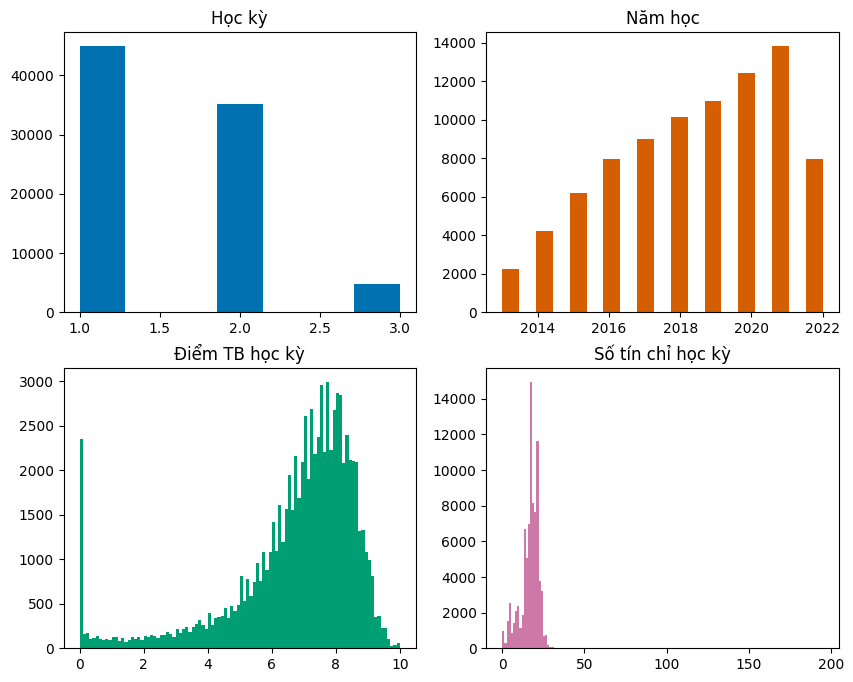

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
axs[0, 0].hist(df_raw['hocky'], color='#0072B2', bins=7)
axs[0, 0].set_title('Học kỳ')
axs[0, 1].hist(df_raw['namhoc'], color='#D55E00', bins=19)
axs[0, 1].set_title('Năm học')
axs[1, 0].hist(df_raw['dtbhk'], color='#009E73', bins=100)
axs[1, 0].set_title('Điểm TB học kỳ')
axs[1, 1].hist(df_raw['sotchk'], color='#CC79A7', bins=150)
axs[1, 1].set_title('Số tín chỉ học kỳ')
plt.show()

Vấn đề xuất hiện ở "Số tín chỉ học kỳ", giá trị lên đến 195 tín/hk. 

Ta tiến hành loại bỏ outlier trên thuộc tính này. 

In [ ]:
mean = np.mean(df_raw['sotchk'])
std = np.std(df_raw['sotchk'])

df_raw['sotchk_zscore'] = (df_raw['sotchk'] - mean) / std
df_raw = df_raw[np.abs(df_raw['sotchk_zscore']) < 3]
df_raw = df_raw.drop('sotchk_zscore', axis=1)
df_raw.shape

(84918, 5)

Kiểm tra lại "Số tín chỉ học kỳ" sau khi loại bỏ Outlier

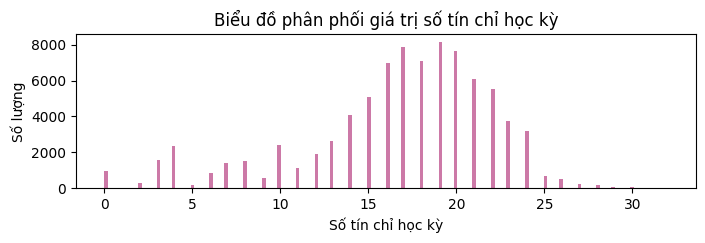

In [ ]:
plt.figure(figsize=(8,2))
plt.hist(df_raw['sotchk'],color='#CC79A7', bins=150)
plt.xlabel('Số tín chỉ học kỳ')
plt.ylabel('Số lượng')
plt.title('Biểu đồ phân phối giá trị số tín chỉ học kỳ')
plt.show()

#**5. Data Encoding**

### Tổ chức dữ liệu huấn luyện (cũ)

In [ ]:
df_raw = pd.read_excel('./data_raw/sinhvien_dtb_hocky.xlsx')
df_raw.head()

,mssv,hocky,namhoc,dtbhk,sotchk
0,48685401XPvAibaEXe99yNsueYx+scOnjQSx4nXO,1,2016,6.45,13
1,48685401XPvAibaEXe99yNsueYx+scOnjQSx4nXO,2,2016,5.86,17
2,48685401XPvAibaEXe99yNsueYx+scOnjQSx4nXO,1,2017,6.54,16
3,48685401XPvAibaEXe99yNsueYx+scOnjQSx4nXO,2,2017,5.67,23
4,48685401XPvAibaEXe99yNsueYx+scOnjQSx4nXO,1,2018,2.27,21


In [ ]:
df_raw.groupby('mssv').count().hocky

mssv
0000AC05XPvAibaEXe9B2tolTZ0JLoBGbkQixQS6     4
0001EB57XPvAibaEXe/twT+sf632fUXnsgPGeB4G     7
00046394XPvAibaEXe+fmxcqgvribEcT4YmJhSFD    10
0006A0BBXPvAibaEXe/lMOwHQdw54DgUkWaqwb1u     1
000AD0D8XPvAibaEXe+RQyZpP6sq6qqIPZXybx3Q     8
                                            ..
FFE53E27XPvAibaEXe+boSxJoV2lkIPm7Byt5HdS     8
FFE9E452XPvAibaEXe+6MN9FoW2mqXtx1lMTF9+D     8
FFEF294AXPvAibaEXe/ceziXFRXnLc/x/K0hVw4d    11
FFF4CD57XPvAibaEXe/z8kRiyNmKNla425pm0Qmc     3
FFFA4234XPvAibaEXe+OhmjSj4XEzdTGgcTdT9fT     9
Name: hocky, Length: 13608, dtype: int64

In [ ]:
def minmax_scaler(value, min, max):
    return (value - min)/(max - min)

In [ ]:
data_range = {
    'dtb': [df_raw['dtbhk'].min(), df_raw['dtbhk'].max()],
    'tc': [df_raw['sotchk'].min(), df_raw['sotchk'].max()],
    'tg': [1, df_raw.groupby('mssv').count().hocky.max()]
} 

def minmax_scaler(value, min, max):
    return (value - min)/(max - min)

In [ ]:
grades_dict = {}
admission_year_dict = {}
tg_dict = {}

df_raw.sort_values(by=['namhoc', 'hocky'], inplace=True)
for index, row in tqdm.tqdm(df_raw.iterrows()):
    mssv = row['mssv']
    if mssv not in admission_year_dict: 
        admission_year_dict[mssv] = row['namhoc']
        tg_dict[mssv] = 1
    else: 
        tg_dict[mssv] += 1 
    
    dtb = minmax_scaler(value=row['dtbhk'], min=data_range['dtb'][0], max=data_range['dtb'][1])
    tc = minmax_scaler(value=row['sotchk'], min=data_range['tc'][0], max=data_range['tc'][1])
    tg = minmax_scaler(value=tg_dict[mssv], min=data_range['tg'][0], max=data_range['tg'][1])
    
    # if mssv in grades_dict:
    #     grades_dict[mssv] = np.vstack((grades_dict[mssv], np.reshape(np.array([dtb, tc, tg]), (1, 3))))
    # else:
    #     grades_dict[mssv] = np.array([np.array([dtb, tc, tg])])
    if mssv in grades_dict:
        grades_dict[mssv].append([dtb, tc, tg])
    else:
        grades_dict[mssv] = [[dtb, tc, tg]]

84918it [00:06, 13683.66it/s]


## Thêm thuộc tính mới vào phạm vi của bài toán

Dữ liệu huấn luyện trước đó đã được định nghĩa, tuy nhiên vì mục đích mở rộng quy mô thực nghiệm nên cần phải thêm dữ liệu chứa thông tin sinh viên vào.

In [ ]:
# đọc dữ liệu thêm
df = pd.read_csv('./data_raw/01.sinhvien_onehot_final.csv')
df.head()
# nối dữ liệu
def load_data(data_path, input_dim, output_dim):
    with open(data_path, 'r') as f:
        data_dict = json.load(f)
    X, y = [], []
    for mssv, infos in tqdm.tqdm(data_dict.items()):
      d=df.loc[df['mssv'] == mssv].values[:1][0]
      infos.insert(0,d[1:].tolist())
      X.append(mssv)
      y.append(infos)
    my_dict = dict(zip(X, y))
    return my_dict
path = 'data/train_dict.json'
X= load_data(path, 2, 2)
# lưu dữ liệu
with open('data/train_dict_new.json', 'w') as f:
    json.dump(X, f)

#**6. Train-Test Split**

## Dữ liệu cũ

Mục tiêu của bài toán là xây dựng mô hình trên thông tin sinh viên năm trước và dự đoán trên những sinh viên mới.

Vì vậy vấn đề hiện tại là tìm ra được năm nhập học để chia sinh viên thành 2 tập sao cho tỉ lệ tập train và test hợp lí.

In [ ]:
admission_year_df = pd.DataFrame.from_dict(admission_year_dict, orient='index', columns=['year'])
count_by_year = admission_year_df.groupby('year').size()

plt.figure(figsize=(8,2))
plt.bar(count_by_year.index, count_by_year.values, color='#D55E00')
plt.xlabel('Năm nhập học')
plt.ylabel('Số học sinh')
plt.show()

Dựa trên biểu đồ phân phối, ta thấy việc chọn sinh viên khoá 2021 và 2022 làm tập test là hợp lí.

In [ ]:
print('Tỉ lệ sinh viên trên tập train:test là: ',
      count_by_year[count_by_year.index < 2020].sum() / count_by_year[count_by_year.index >= 2020].sum() )

Tỉ lệ sinh viên trên tập train:test là:  1.5358342665173572


Tiến hành chia dữ liệu để lưu trữ

In [ ]:
train_grades_dict = {}
test_grades_dict = {}

for mssv, grades in tqdm.tqdm(grades_dict.items()):
    if admission_year_dict[mssv] < 2020: 
        train_grades_dict[mssv] = grades
    else: 
        test_grades_dict[mssv] = grades 

100%|██████████| 13587/13587 [00:00<00:00, 1246266.07it/s]


## Dữ liệu mới

In [ ]:
with open('data/train_dict_new.json') as file:
    data = json.load(file)
mssv = list(data.keys())
mssv[:5]

['7E308531XPvAibaEXe879+AOg1gh8i58Q/VMq7RU',
 '0FCB6532XPvAibaEXe879+AOg1gh8o0EEQcYQ8HR',
 'BAF446BFXPvAibaEXe879+AOg1gh8uQrEauqA0AG',
 '599DFFB8XPvAibaEXe879+AOg1gh8lJvChSN7o+V',
 '364B9E9BXPvAibaEXe879+AOg1gh8sRVdBmZSiXe']

In [ ]:
df_raw.head()

,mssv,hocky,namhoc,dtbhk,sotchk
0,48685401XPvAibaEXe99yNsueYx+scOnjQSx4nXO,1,2016,6.45,13
1,48685401XPvAibaEXe99yNsueYx+scOnjQSx4nXO,2,2016,5.86,17
2,48685401XPvAibaEXe99yNsueYx+scOnjQSx4nXO,1,2017,6.54,16
3,48685401XPvAibaEXe99yNsueYx+scOnjQSx4nXO,2,2017,5.67,23
4,48685401XPvAibaEXe99yNsueYx+scOnjQSx4nXO,1,2018,2.27,21


Nhóm sẽ sử dụng dữ liệu từ các sinh viên khóa 2018, 2019 làm dữ liệu test. Điều này có những lí do sau:
+ Dữ liệu điểm sau khi merge với file 01.sinhvien.xlsx thì các sinh viên khóa 2020, 2021 tuy có điểm học tập nhưng lại không có thông tin, lý lịch
+ Bài toán tập trung vào việc dự đoán điểm của các sinh viên đến sau, do đó buộc phải sử dụng các sinh viên ở khóa trước đó để làm dữ liệu huấn luyện

### Chọn ra danh sách mssv cho tập test

In [ ]:
sv_namhoc = pd.DataFrame(df_raw.groupby(['mssv']).min().namhoc)
mssv_test = sv_namhoc.loc[sv_namhoc['namhoc'] >= 2018]#.drop(['namhoc'], axis = 1)#.values.tolist()
mssv_test = mssv_test.loc[mssv_test['namhoc'] <= 2019]
mssv_test.to_csv('./data/mssv_test.csv')
mssv_test.head()

,namhoc
mssv,
0001EB57XPvAibaEXe/twT+sf632fUXnsgPGeB4G,2019
000AD0D8XPvAibaEXe+RQyZpP6sq6qqIPZXybx3Q,2018
0013D6E5XPvAibaEXe85hkLGQAJy3XgK9pA18A31,2018
0018C59CXPvAibaEXe8C3lblh2dNniH+SYgLosUA,2019
00256CA6XPvAibaEXe9ZBnO1fewQMfc0mu/9tLFg,2019


### Chọn ra danh sách mssv cho tập train

In [ ]:
sv_namhoc = pd.DataFrame(df_raw.groupby(['mssv']).min().namhoc)
mssv_train = sv_namhoc.loc[sv_namhoc['namhoc'] < 2018]#.drop(['namhoc'], axis = 1)#.values.tolist()
mssv_train.to_csv('./data/mssv_train.csv')
mssv_train.head()

,namhoc
mssv,
00046394XPvAibaEXe+fmxcqgvribEcT4YmJhSFD,2013
001BB05EXPvAibaEXe/YKAlYnC3m92BzM+VhZyc0,2013
001E045BXPvAibaEXe+n07P56kWx2N6EoOCUJBA4,2017
004E12B9XPvAibaEXe81r7KrCH0uc0uxBtoBw4BG,2017
005116E7XPvAibaEXe8VdV75E6kcrk07Zn1wf/T8,2014


### Kiểm tra kích thước của 2 tập

In [ ]:
mssv_test = pd.read_csv('./data/mssv_test.csv')
test = mssv_test.iloc[:, 0].values

mssv_train = pd.read_csv('./data/mssv_train.csv')
train = mssv_train.iloc[:, 0].values

print('train:', len(train),'sinh viên')
print('test:', len(test),'sinh viên')
print('tập train lớn hơn tập test',len(train)/len(test),'lần')

train: 5108 sinh viên
test: 3121 sinh viên
tập train lớn hơn tập test 1.6366549182954182 lần


In [ ]:
train_dict = {}
for item in train:
  train_dict[item] = data[item]
train_dict

In [ ]:
test_dict = {}
for item in test:
  test_dict[item] = data[item]
test_dict

In [ ]:
len(train_dict.keys())/len(test_dict.keys())

1.6366549182954182

#**7. Save Data**

In [ ]:
with open('data/final_train_dict.json', 'w') as f:
    json.dump(train_dict, f)
with open('data/final_test_dict.json', 'w') as f:
    json.dump(test_dict, f)

In [5]:
from utils import minmax_scale, load_data, data_range, visualize_result, save_result 

train_path = 'data/final_train_dict.json'
test_path = 'data/final_test_dict.json'
input_dim = 2 # thay đổi
output_dim = 2 # thay đổi

In [11]:
train_path = 'data/final_train_dict.json'
test_path = 'data/final_test_dict.json'
for i in range(1, 7):
    for j in range(1, 3):
        X_train, y_train = load_data(data_path=train_path, input_dim=i, output_dim=j) 
        X_test, y_test = load_data(data_path=test_path, input_dim=i, output_dim=j)
        print(f'Input{i}, Ouput{j}: ', X_train.shape, y_train.shape, X_test.shape, y_test.shape)

Input1, Ouput1:  (40789, 16) (40789, 1) (19579, 16) (19579, 1)
Input1, Ouput2:  (35808, 16) (35808, 2) (16509, 16) (16509, 2)
Input2, Ouput1:  (35808, 19) (35808, 1) (16509, 19) (16509, 1)
Input2, Ouput2:  (30990, 19) (30990, 2) (13520, 19) (13520, 2)
Input3, Ouput1:  (30990, 22) (30990, 1) (13520, 22) (13520, 1)
Input3, Ouput2:  (26282, 22) (26282, 2) (10588, 22) (10588, 2)
Input4, Ouput1:  (26282, 25) (26282, 1) (10588, 25) (10588, 1)
Input4, Ouput2:  (21678, 25) (21678, 2) (7711, 25) (7711, 2)
Input5, Ouput1:  (21678, 28) (21678, 1) (7711, 28) (7711, 1)
Input5, Ouput2:  (17184, 28) (17184, 2) (4873, 28) (4873, 2)
Input6, Ouput1:  (17184, 31) (17184, 1) (4873, 31) (4873, 1)
Input6, Ouput2:  (12794, 31) (12794, 2) (2120, 31) (2120, 2)


In [10]:
train_path = 'data/final_train_dict.json'
test_path = 'data/final_test_dict.json'
input_dim = 2 # thay đổi
output_dim = 1 # thay đổi
X_train, y_train = load_data(data_path=train_path, input_dim=i, output_dim=j)
X_test, y_test = load_data(data_path=test_path, input_dim=i, output_dim=j)
X_train[0]

array([1.        , 0.53571429, 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.541     , 0.6875    ,
       0.        , 0.707     , 0.46875   , 0.04761905, 0.775     ,
       0.1875    , 0.0952381 , 0.636     , 0.78125   , 0.14285714,
       0.832     , 0.5       , 0.19047619])